In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.style.use('ggplot')

user_train_indices = np.array(pd.read_csv(filepath_or_buffer='./user_train_indices.csv', header=None))
movie_train_indices = np.array(pd.read_csv(filepath_or_buffer='./movie_train_indices.csv', header=None))

U = np.array(pd.read_csv(filepath_or_buffer='./U.csv', header=None))
M = np.array(pd.read_csv(filepath_or_buffer='./M.csv', header=None))

In [14]:
users_table = pd.read_csv(filepath_or_buffer='./ml-1m/users.dat',
                          sep='::', delimiter=None, header=0, names=['user_id', 'gender', 'age', 'occupation', 'zip_code'], engine='python')


users_table = users_table.iloc[user_train_indices[:,0]]
age = np.array(users_table['age'])

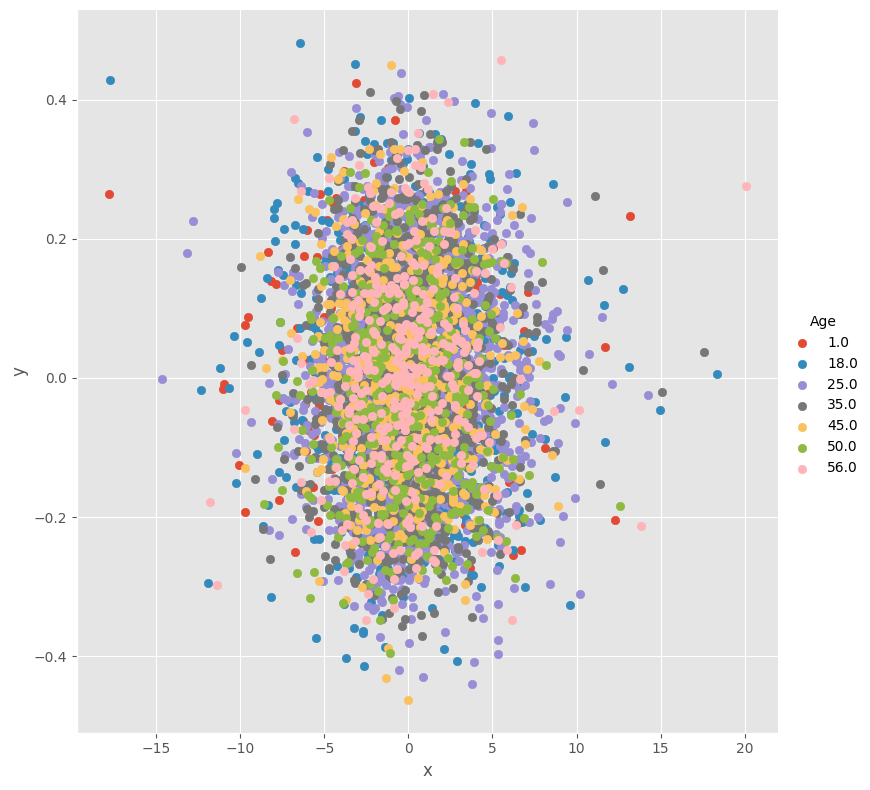

In [15]:

train_data_mean_and_std = StandardScaler().fit_transform(U)

pca = PCA()

pca.n_components = 2
pca_data = pca.fit_transform(train_data_mean_and_std)

pca_data = np.vstack((pca_data.T,age.T)).T

pca_df = pd.DataFrame(data=pca_data,columns=('x','y','Age'))
sns.FacetGrid(pca_df,hue='Age',height=8).map(plt.scatter,'x','y').add_legend()
plt.savefig('pca_users.png')
plt.show()

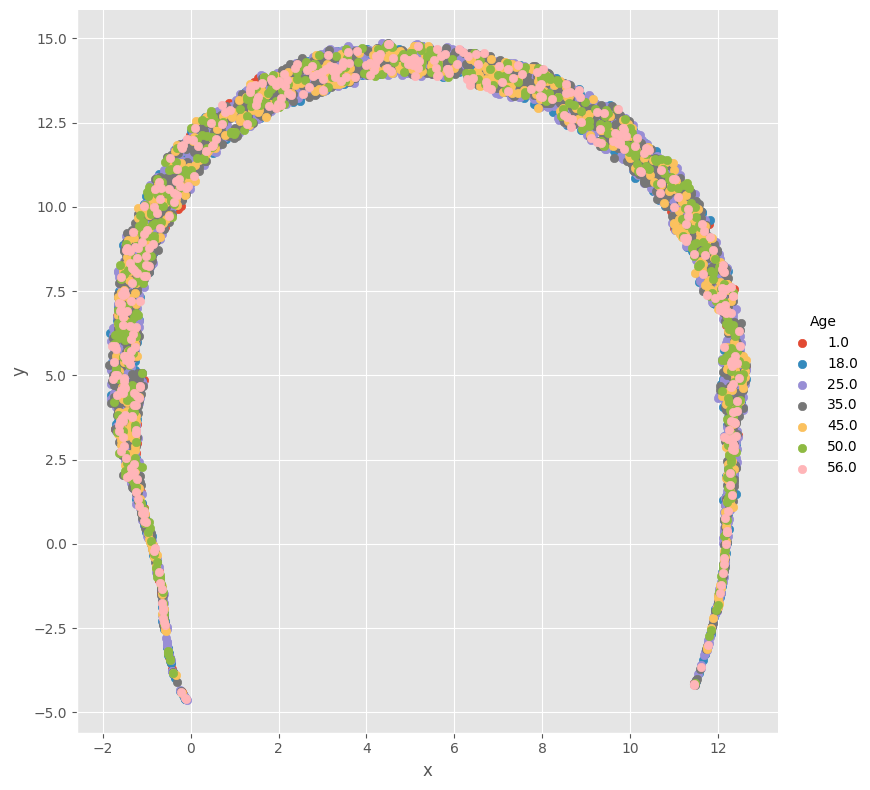

In [16]:
import umap.umap_ as umap
reducer = umap.UMAP()

scaled_data = StandardScaler().fit_transform(U)
train_data_mean_and_std = reducer.fit_transform(scaled_data)

umap_data = np.vstack((train_data_mean_and_std.T,age.T)).T
umap_df = pd.DataFrame(data=umap_data,columns=('x','y','Age'))

sns.FacetGrid(umap_df,hue='Age',height=8).map(plt.scatter,'x','y').add_legend()

plt.savefig('umap_users.png')

c:\Users\cheemo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\cheemo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


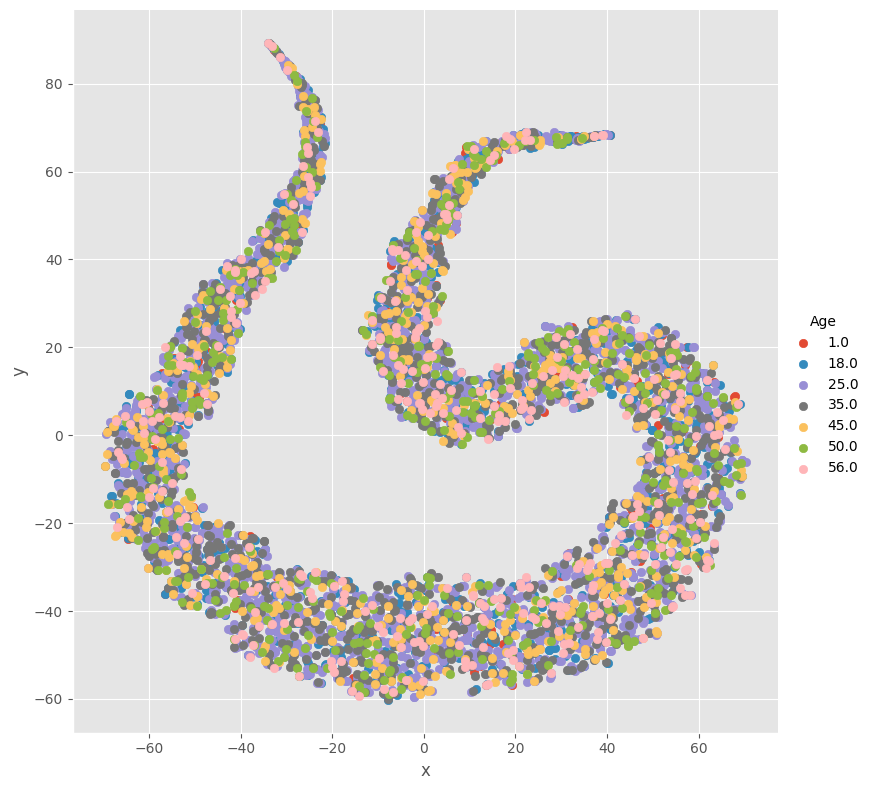

In [17]:
import numpy as np
from sklearn.manifold import TSNE

data = U
label = age
model = TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(data)
tsne_data = np.vstack((tsne_data.T,label.T)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=('x','y','Age'))
sns.FacetGrid(tsne_df,hue='Age',height=8).map(plt.scatter,'x','y').add_legend()
plt.savefig('tsne_users.png')
plt.show()

In [18]:
movies_table = pd.read_csv(filepath_or_buffer='./ml-1m/movies.dat',
                          sep='::', delimiter=None, header=0, names=['movie_id','title','genres'], engine='python')

movies_table = movies_table.iloc[movie_train_indices[:,0]]

genres = movies_table['genres']

genres = pd.DataFrame(genres.str.split('|', expand=True))
genres = genres[:][0]


genres = np.array(genres)

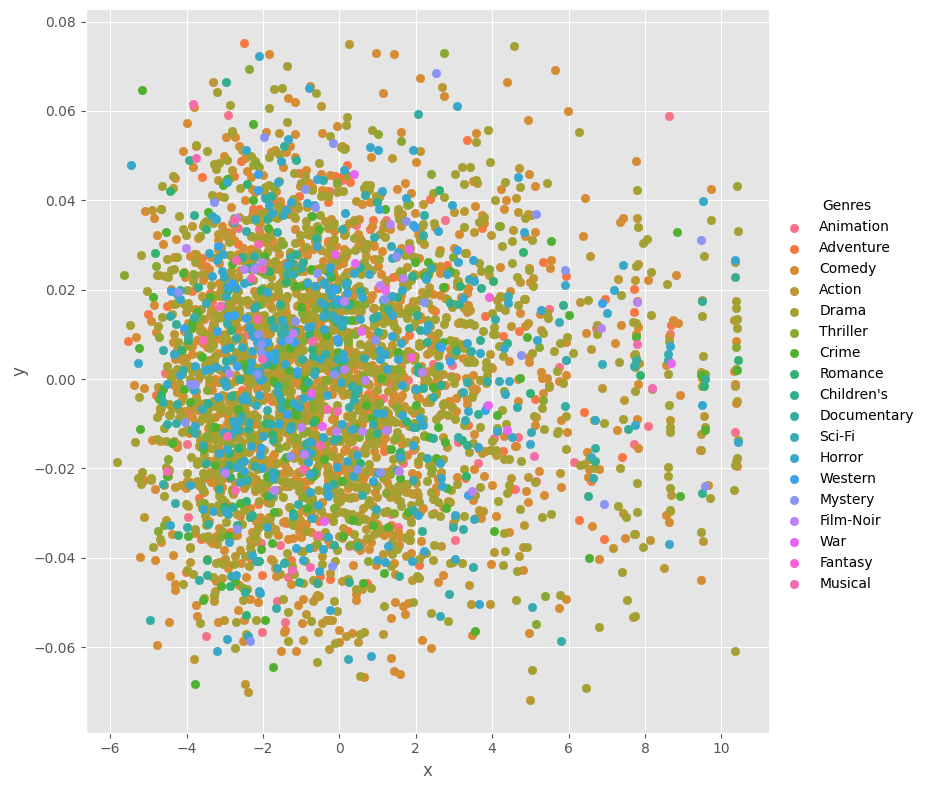

In [19]:
train_data_mean_and_std = StandardScaler().fit_transform(M.T)

pca = PCA()


pca.n_components = 2
pca_data = pca.fit_transform(train_data_mean_and_std)

pca_data = np.vstack((pca_data.T,genres.T)).T
pca_df = pd.DataFrame(data=pca_data,columns=('x','y','Genres'))
sns.FacetGrid(pca_df,hue='Genres',height=8).map(plt.scatter,'x','y').add_legend()
plt.savefig('pca_movies.png')


c:\Users\cheemo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\cheemo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


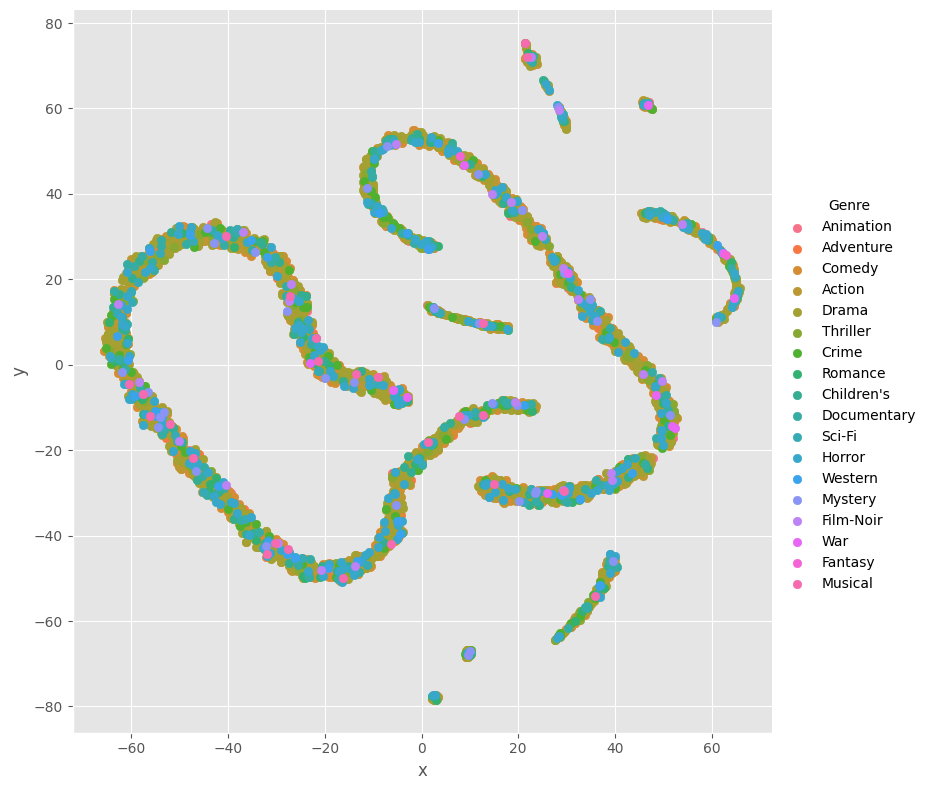

In [20]:
data = M
label = genres
model = TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(data.T)
tsne_data = np.vstack((tsne_data.T,label.T)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=('x','y','Genre'))
sns.FacetGrid(tsne_df,hue='Genre',height=8).map(plt.scatter,'x','y').add_legend()
plt.savefig('tsne_movies.png')
plt.show()


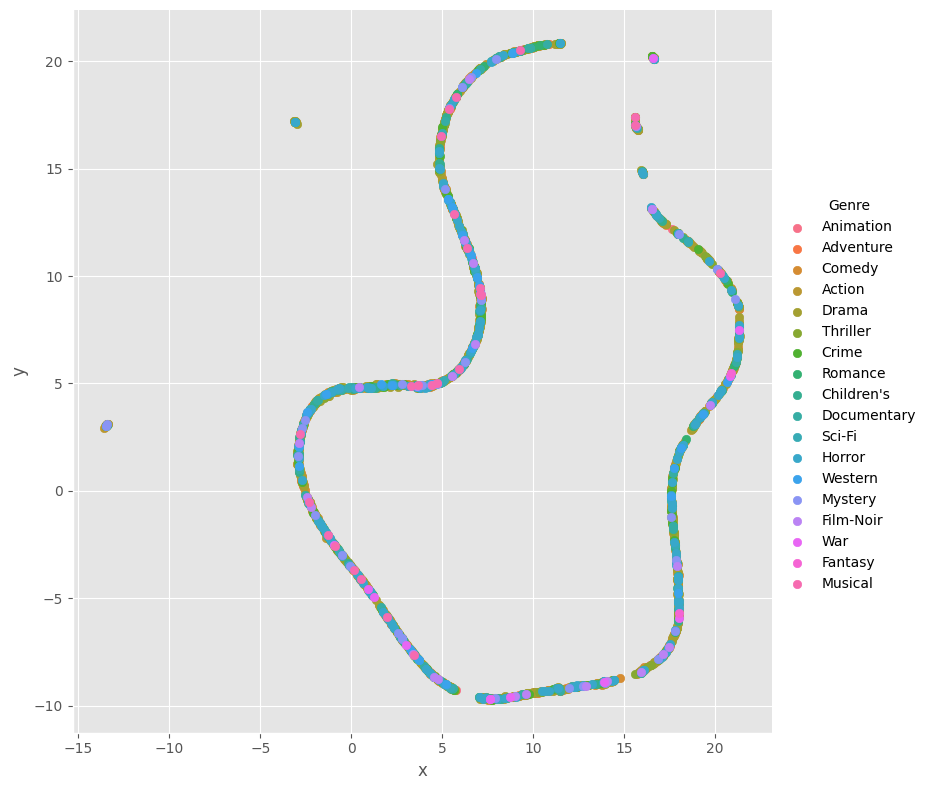

In [21]:
scaled_data = StandardScaler().fit_transform(M.T)
train_data_mean_and_std = reducer.fit_transform(scaled_data)

umap_data = np.vstack((train_data_mean_and_std.T,genres.T)).T
umap_df = pd.DataFrame(data=umap_data,columns=('x','y','Genre'))

sns.FacetGrid(umap_df,hue='Genre',height=8).map(plt.scatter,'x','y').add_legend()

plt.savefig('umap_movies.png')